In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
from tqdm import tqdm
from random import randint
from time import sleep
import time
import random
from matplotlib import cm
import seaborn as sns
import networkx as nx

To do:
1) Example graphs (n>9, complete and largest components)
2) connectedness measures (number of connections - node degrees, clustering coefficients, Betweenness centrality)
3) Conclusions?
4) Percentage female for different PLC numbers of officers
5) Write-up/Readme/Git - motivations, success measures, areas for further investigation (both network and percentage).

In [3]:
companies = pd.read_csv('BasicCompanyDataAsOneFile-2021-03-11.csv')
companies.info()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905585 entries, 0 to 4905584
Data columns (total 55 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   CompanyName                         object 
 1    CompanyNumber                      object 
 2   RegAddress.CareOf                   object 
 3   RegAddress.POBox                    object 
 4   RegAddress.AddressLine1             object 
 5    RegAddress.AddressLine2            object 
 6   RegAddress.PostTown                 object 
 7   RegAddress.County                   object 
 8   RegAddress.Country                  object 
 9   RegAddress.PostCode                 object 
 10  CompanyCategory                     object 
 11  CompanyStatus                       object 
 12  CountryOfOrigin                     object 
 13  DissolutionDate                     float64
 14  IncorporationDate                   object 
 15  Accounts.AccountRefDay              float64
 16  

In [8]:
companies.iloc[0,:]

CompanyName                                                                   ! LIMITED
 CompanyNumber                                                                 12778855
RegAddress.CareOf                                                                   NaN
RegAddress.POBox                                                                    NaN
RegAddress.AddressLine1                                   UNIT 3 NEWTON BUSINESS CENTRE
 RegAddress.AddressLine2                                           NEWTON CHAMBERS ROAD
RegAddress.PostTown                                                           SHEFFIELD
RegAddress.County                                                                   NaN
RegAddress.Country                                                       UNITED KINGDOM
RegAddress.PostCode                                                             S35 2PH
CompanyCategory                                                 Private Limited Company
CompanyStatus                   

In [13]:
companies.head(1)

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LIMITED,12778855,NaN,NaN,UNIT 3 NEWTON BUSINESS CENTRE,NEWTON CHAMBERS ROAD,SHEFFIELD,NaN,UNITED KINGDOM,S35 2PH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/08/2021,NaN


In [15]:
companies1 = companies[companies['CompanyStatus'] == 'Active'][['CompanyName', ' CompanyNumber',]]

In [16]:
companies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620357 entries, 0 to 4905584
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   CompanyName     object
 1    CompanyNumber  object
dtypes: object(2)
memory usage: 105.8+ MB


In [18]:
companies1.to_csv('companies1.csv')

In [ ]:
https://find-and-update.company-information.service.gov.uk/company/12778855/officers

In [138]:
urlp = "https://find-and-update.company-information.service.gov.uk/company/09409467/officers"
rp = requests.get(urlp)
soup = BeautifulSoup(rp.text, 'html.parser')
soup

<!DOCTYPE html>

<!--[if lt IE 9]><html class="lte-ie8" lang="en"><![endif]-->
<!--[if gt IE 8]><!--><html lang="en"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<!-- Company numbers are not taken as a phone number -->
<meta content="telephone=no" name="format-detection"/>
<title data-id="company_officers">1644 CLUB PLC - Officers (free information from Companies House)</title>
<meta content="1644 CLUB PLC - Free company information from Companies House including registered office address, filing history, accounts, annual return, officers, charges, business activity" name="description"/>
<script>
      (function(){if(navigator.userAgent.match(/IEMobile\/10\.0/)){var d=document,c="appendChild",a=d.createElement("style");a[c](d.createTextNode("@-ms-viewport{width:auto!important}"));d.getElementsByTagName("head")[0][c](a);}})();
   </script>
<!--[if gt IE 8]><!--><link href="//d1mhdmez52qjiz.cloudfront.net/stylesheets/assets-digital-cabinet-o

In [140]:
o_role =[]
for i in range(1,11):


    for appt in soup.find_all('div', attrs = {'class':f'appointment-{i}'}):
    
        try:
            app = appt.find('dd',attrs = { 'id' : f'officer-role-{i}'}).text.strip()        
            o_role.append(app)
        except:
            o_role.append(np.nan)
        
o_role

['Secretary', 'Director', 'Director', 'Director']

In [142]:
o_name=[]
o_role=[]
i=1
for i in range(1,36):
    for appt in soup.find_all('div', attrs = {'class':f'appointment-{i}'}):
        if appt.find('span',attrs = { 'id' : f'officer-status-tag-{i}'}).text.strip() != 'Active':
            continue
        else:
            try:
                role = appt.find('dd',attrs = { 'id' : f'officer-role-{i}'}).text.strip()        
                o_role.append(role)
            except:
                o_role.append(np.nan)
            try:
                name = appt.find('a').text.strip()        
                o_name.append(name)
            except:
                o_name.append(np.nan)
            i+=1
print(o_name)
print(o_role)



['EUROTAX SECRETARIES LTD', 'HAMPDEN-WHITE, Colin George, Sir', 'MARUSZEWSKI, Krzysztof Tomasz', 'ORR, Christopher Andrew']
['Secretary', 'Director', 'Director', 'Director']


In [99]:
plcs1['names']=0
plcs1['roles']=0

In [101]:
plcs1.head(10)

,CompanyName,CompanyNumber,names,roles
695,00062246 PLC,00062246,0,0
727,00150042 PLC,00150042,0,0
785,00358466 PLC,00358466,0,0
808,00496454 PLC,00496454,0,0
1093,01745110 PLC,01745110,0,0
1166,02229539 PLC,02229539,0,0
5384,1066 THE FILM PLC,06558400,0,0
5756,10A GROUP PLC,11774850,0,0
9128,123V PLC,SC178923,0,0
9377,127 PICCADILLY PLC,02072531,0,0


In [152]:
for c in tqdm(range (4712,5218)):
    cono = plcs1.iloc[c,1]
    urlp = f'https://find-and-update.company-information.service.gov.uk/company/{cono}/officers'
    rp = requests.get(urlp)
    #print(rp.status_code)
    soup = BeautifulSoup(rp.text, 'html.parser')
    o_name=[]
    o_role=[]
    
    for i in range(1,36):
        for appt in soup.find_all('div', attrs = {'class':f'appointment-{i}'}):
            
            if appt.find('span',attrs = { 'id' : f'officer-status-tag-{i}'}).text.strip() != 'Active':
                continue    
            else:
                try:
                    role = appt.find('dd',attrs = { 'id' : f'officer-role-{i}'}).text.strip()        
                    o_role.append(role)
                except:
                    o_role.append(np.nan)
                try:
                    name = appt.find('a').text.strip()+':'        
                    o_name.append(name)
                except:
                    o_name.append(np.nan)
                i+=1
    plcs1.iloc[c,2] = o_name
    plcs1.iloc[c,3] = o_role
    time.sleep(randint(5,7))

100%|████████████████████████████████████████████████████████████████████████████████| 506/506 [56:20<00:00,  6.68s/it]


In [2]:
plcs1 = pd.read_csv('plcs1.csv')

In [3]:
plcs1['names'] = [x.replace(':','') for x in plcs1.names]

In [4]:
plcs1.tail()

,Unnamed: 0,CompanyName,CompanyNumber,names,roles
5213,4618059,ZT INVEST PLC,12090941,"['ABEL, Stephen John', 'GUZZO, Andrea', 'MIGAT...","['Secretary', 'Director', 'Director', 'Directo..."
5214,4619033,ZURICH ASSURANCE (2004) PLC,AC001783,[],[]
5215,4619045,ZURICH FINANCE (UK) PLC,04463547,"['ZURICH CORPORATE SECRETARY (UK) LIMITED', 'C...","['Secretary', 'Director', 'Director', 'Directo..."
5216,4619981,ZYTRONIC PLC,03881244,"['SMITH, Claire', 'BUFFHAM, David John', 'CAMB...","['Secretary', 'Director', 'Director', 'Directo..."
5217,4620118,ZZOOMM PLC,11738914,"['INCE GD CORPORATE SERVICES LIMITED', 'HARE, ...","['Secretary', 'Director', 'Director']"


In [5]:
import ast

ast.literal_eval(plcs1['names'][23])[0].split(',')[1].split(' ')[1]

'Jonathan'

In [6]:
plcs1['officernos']=0
plcs1['officernos'] = [len(ast.literal_eval(x)) for x in plcs1['names']]

In [7]:
import gender_guesser.detector as gender
from guess_indian_gender import IndianGenderPredictor
i = IndianGenderPredictor()
d = gender.Detector(case_sensitive=False)
def get_genders(x):
    gens = []
    for j in range(len(ast.literal_eval(x))):
        try:
            g = d.get_gender(ast.literal_eval(x)[j].split(',')[1].split(' ')[1])
            if g == 'unknown':
                try:
                    g = i.predict(name=ast.literal_eval(x)[j].split(',')[1].split(' ')[1])
                except:
                    g = 'unknown'
            
        except:
            g = 'unknown'
        gens.append(g)
    return gens

In [8]:
plcs1['genders'] = 0
plcs1['genders'] = [get_genders(x) for x in plcs1['names']]

In [9]:
plcs1.genders

0                                            [male]
1                                                []
2                                                []
3                        [female, male, male, male]
4                        [male, female, male, male]
                           ...                     
5213               [male, female, male, male, male]
5214                                             []
5215    [unknown, male, male, female, female, male]
5216             [female, male, male, male, female]
5217                       [unknown, male, unknown]
Name: genders, Length: 5218, dtype: object

In [10]:
plcs1['genders'] = [[y.replace('mostly_','') for y in x] for x in plcs1['genders']]

In [11]:
plcs1['genders'] = [[y.replace('andy','unknown') for y in x] for x in plcs1['genders']]

In [12]:
plcs1.head()

,Unnamed: 0,CompanyName,CompanyNumber,names,roles,officernos,genders
0,695,00062246 PLC,00062246,"['STONE, Arthur James']",['Secretary'],1,[male]
1,727,00150042 PLC,00150042,[],[],0,[]
2,785,00358466 PLC,00358466,[],[],0,[]
3,808,00496454 PLC,00496454,"['KNIGHT, Yvonne', 'CORT, Roger', 'FINCH, Kenn...","['Secretary', 'Director', 'Director', 'Director']",4,"[female, male, male, male]"
4,1093,01745110 PLC,01745110,"['ROBINSON, Harry', 'JOLL, Dorothy Monica', 'J...","['Secretary', 'Director', 'Director', 'Director']",4,"[male, female, male, male]"


In [13]:
plcs1['offmales'] = [sum([1 if j == 'male' else 0 for j in k]) for k in plcs1['genders']]

In [14]:
plcs1['offfemales'] = [sum([1 if j == 'female' else 0 for j in k]) for k in plcs1['genders']]

In [15]:
plcs1['offuk'] = [sum([1 if j == 'unknown' else 0 for j in k]) for k in plcs1['genders']]

In [16]:
plcs1.head()

,Unnamed: 0,CompanyName,CompanyNumber,names,roles,officernos,genders,offmales,offfemales,offuk
0,695,00062246 PLC,00062246,"['STONE, Arthur James']",['Secretary'],1,[male],1,0,0
1,727,00150042 PLC,00150042,[],[],0,[],0,0,0
2,785,00358466 PLC,00358466,[],[],0,[],0,0,0
3,808,00496454 PLC,00496454,"['KNIGHT, Yvonne', 'CORT, Roger', 'FINCH, Kenn...","['Secretary', 'Director', 'Director', 'Director']",4,"[female, male, male, male]",3,1,0
4,1093,01745110 PLC,01745110,"['ROBINSON, Harry', 'JOLL, Dorothy Monica', 'J...","['Secretary', 'Director', 'Director', 'Director']",4,"[male, female, male, male]",3,1,0


In [17]:
plcs2 = plcs1[plcs1['officernos']>1]

In [38]:
plcs2['% female officers'] = (plcs2.offfemales/plcs2.officernos)*100

<ipython-input-38-299c65b03006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plcs2['% female officers'] = (plcs2.offfemales/plcs2.officernos)*100


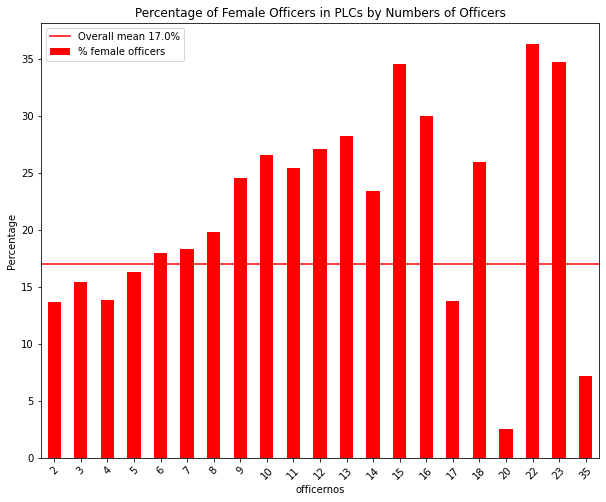

In [39]:
plcs2.groupby('officernos')['% female officers'].mean().plot(
    kind='bar', color='r',figsize = (10,8))
plt.xticks(rotation=45)
plt.axhline(y = plcs2['% female officers'].mean(), color = 'r', linestyle = '-', label = 'Overall mean ' + str(round((plcs2['% female officers'].mean()),2))+'%')
plt.ylabel('Percentage')
plt.legend()
plt.title('Percentage of Female Officers in PLCs by Numbers of Officers')
plt.show()

In [40]:
plcs5 = plcs1[plcs1['officernos']>4]

In [41]:
plcs5['offcols'] = [['black' if elem =='unknown' else 'red' if elem == 'male' else 'yellow'  for elem in plcs5.loc[k,'genders']] for k in plcs5.index]

<ipython-input-41-5f7a99939fad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plcs5['offcols'] = [['black' if elem =='unknown' else 'red' if elem == 'male' else 'yellow'  for elem in plcs5.loc[k,'genders']] for k in plcs5.index]


In [42]:
plcs5['cocols'] = 'black'

<ipython-input-42-c761b07a9e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plcs5['cocols'] = 'black'


In [43]:
lines = [plcs5.loc[k,'CompanyName'] + ';' + ';'.join([str(elem) for elem in ast.literal_eval(plcs5.loc[k,'names'])]) for k in plcs5.index]

In [44]:
G5 = nx.parse_adjlist(lines, delimiter = ';')

In [45]:
for m in plcs5.index:
    G5.nodes[plcs5.loc[m,'CompanyName']]['color'] = plcs5.loc[m,'cocols']
    for n in range(len(plcs5.loc[m,'genders'])):
        G5.nodes[ast.literal_eval(plcs5.loc[m,'names'])[n]]['color'] = plcs5.loc[m,'offcols'][n]    

In [46]:
largest_cc = G5.subgraph(max(nx.connected_components(G5),key = len))


In [ ]:
plt.figure(figsize=(300, 300))
nx.drawing.nx_pylab.draw_spring(largest_cc,with_labels = True, node_color = [x[1] for x in list(largest_cc.nodes('color'))] )
plt.show()

In [ ]:
plt.figure(figsize=(300, 300))
nx.drawing.nx_pylab.draw_spring(G5,with_labels = True, node_color = [x[1] for x in list(G5.nodes('color'))])
plt.show()

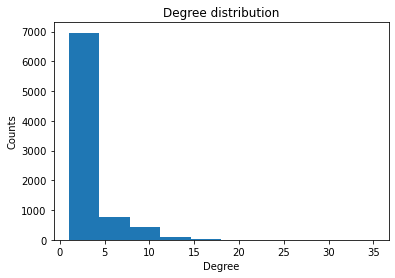

In [47]:
plt.hist(list(dict(largest_cc.degree()).values()),
         )
plt.yticks()
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

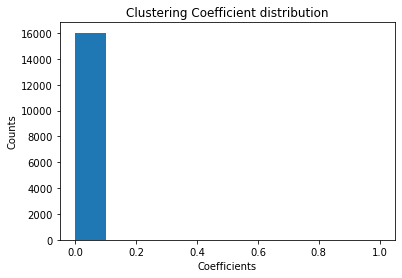

In [61]:
plt.hist(list(dict(nx.clustering(G5)).values()),
          )
#plt.yticks([0, 1, 2])
plt.xlabel('Coefficients')
plt.ylabel('Counts')
plt.title('Clustering Coefficient distribution')
plt.show()

In [60]:
sum(list(dict(nx.clustering(G5)).values()))

4.056349206349206

In [77]:
Degrees5.index

Index(['123V PLC', 'TASKER, Ann', 'ANDERSON, Pamela',
       'DRYSDALE, Robert Stewart', 'FREEMAN, David John', 'FREEMAN, Jean Ann',
       'MARLIN, Alexandra Jayne', 'MARLIN, Robin Arthur',
       'MARLIN, Samuel Arthur', 'MARLIN, Soffia',
       ...
       'CARL, Christian Henning Peter', 'HESKETH, Mark',
       'PICKFORD, Helen Alison', 'SULLIVAN, Maura', 'VINCENT, Matthew James',
       'ZYTRONIC PLC', 'SMITH, Claire', 'BUFFHAM, David John',
       'CAMBRIDGE, Mark', 'SMITH, Claire Louise'],
      dtype='object', length=16038)

In [110]:
Degrees5 = pd.DataFrame.from_dict(dict(nx.degree(G5)),orient='index', columns=['degree'])
Degrees5 = Degrees5.reset_index()

In [111]:
Degrees5

,index,degree
0,123V PLC,9
1,"TASKER, Ann",1
2,"ANDERSON, Pamela",1
3,"DRYSDALE, Robert Stewart",1
4,"FREEMAN, David John",1
...,...,...
16033,ZYTRONIC PLC,5
16034,"SMITH, Claire",1
16035,"BUFFHAM, David John",1
16036,"CAMBRIDGE, Mark",1


In [115]:
Deg5 = Degrees5[(Degrees5['degree'] > 1) & (~Degrees5['index'].str.contains("PLC")) & (~Degrees5['index'].str.contains("P.L.C.")) & (~Degrees5['index'].str.contains("Limited")) ]

In [124]:
Deg5a = Degrees5[(Degrees5['degree'] > 1) & (Degrees5['index'].str not in plcs5.CompanyName)  ]

In [125]:
Deg5a


,index,degree
0,123V PLC,9
10,1SPATIAL PLC,6
16,"SMALL, Francis David",2
17,3I GROUP PLC,9
18,"DUNN, Kevin John",4
...,...,...
16007,ZOO DIGITAL GROUP PLC,6
16013,ZOTEFOAMS PLC,8
16020,ZT INVEST PLC,5
16026,ZURICH FINANCE (UK) PLC,6


In [116]:
Deg5 = Deg5.sort_values(by = 'degree', ascending=False)

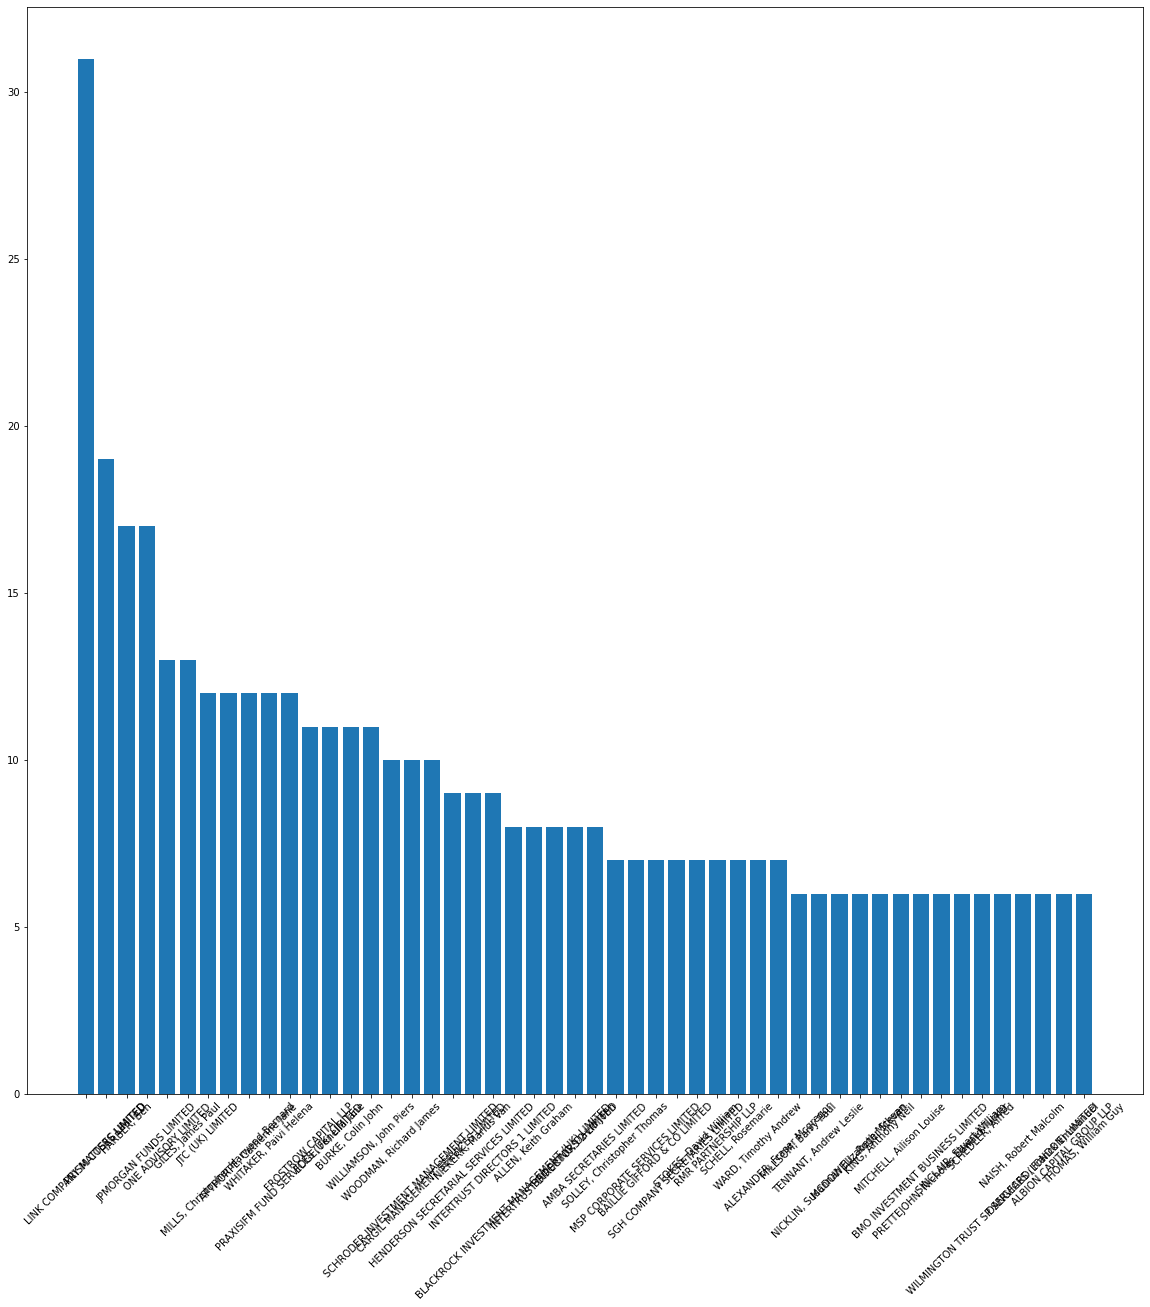

In [117]:
plt.figure(figsize = (20,20))
plt.bar(Deg5['index'][:50], Deg5.degree[:50])
plt.xticks(rotation = 45)
plt.show();

In [19]:
comps = pd.read_csv('companies1.csv')
comps.head()

,Unnamed: 0,CompanyName,CompanyNumber
0,0,! LIMITED,12778855
1,1,! LTD,08209948
2,2,!? LTD,11399177
3,3,!BIG IMPACT GRAPHICS LIMITED,11743365
4,4,!L PRODUCTIONS LIMITED,12402527


In [ ]:
plcslist = [1 if 'PLC' in x else 1 if 'P.L.C.' in x else 0 for x in comps.CompanyName]

In [ ]:
sum(plcslist)

In [30]:
comps['plcs'] = plcslist

In [31]:
comps.head()

,Unnamed: 0,CompanyName,CompanyNumber,plcs
0,0,! LIMITED,12778855,0
1,1,! LTD,08209948,0
2,2,!? LTD,11399177,0
3,3,!BIG IMPACT GRAPHICS LIMITED,11743365,0
4,4,!L PRODUCTIONS LIMITED,12402527,0


In [37]:
plcs = comps[comps['plcs'] == 1]
plcs1 = plcs.drop(columns = ['Unnamed: 0', 'plcs'])
plcs1 = plcs1.rename(columns = {' CompanyNumber': 'CompanyNumber'})
plcs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5218 entries, 695 to 4620118
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CompanyName    5218 non-null   object
 1   CompanyNumber  5218 non-null   object
dtypes: object(2)
memory usage: 122.3+ KB


In [ ]:
plcs1.to_csv('plcs1.csv')